In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
df.drop(columns=['PassengerId','Cabin'],inplace=True)

In [46]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [47]:
print(df["Age"].isnull().sum())

177


In [48]:
median_age = df['Age'].median()

df['Age']=df['Age'].fillna(median_age)

In [49]:
df['Embarked']=df['Embarked'].fillna('S')

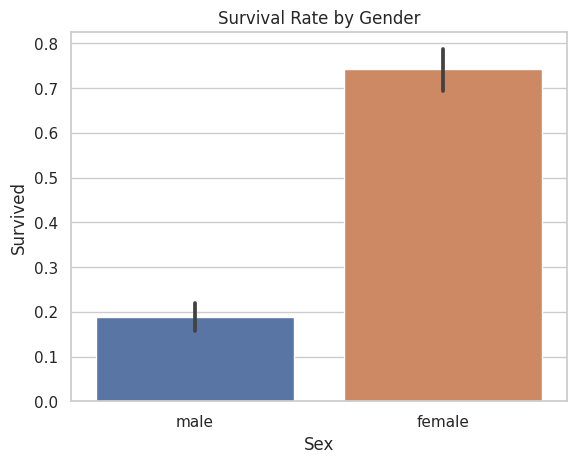

In [50]:
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()


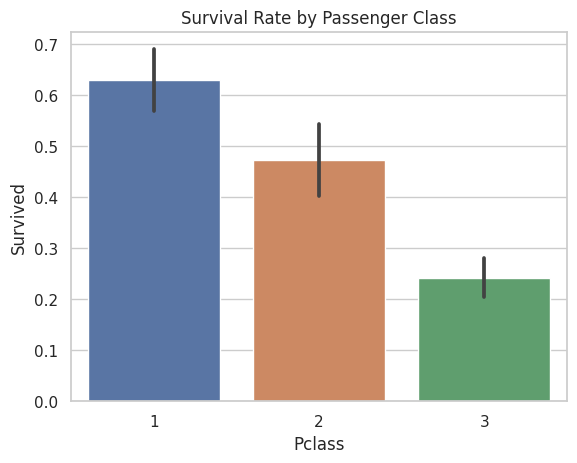

In [51]:
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


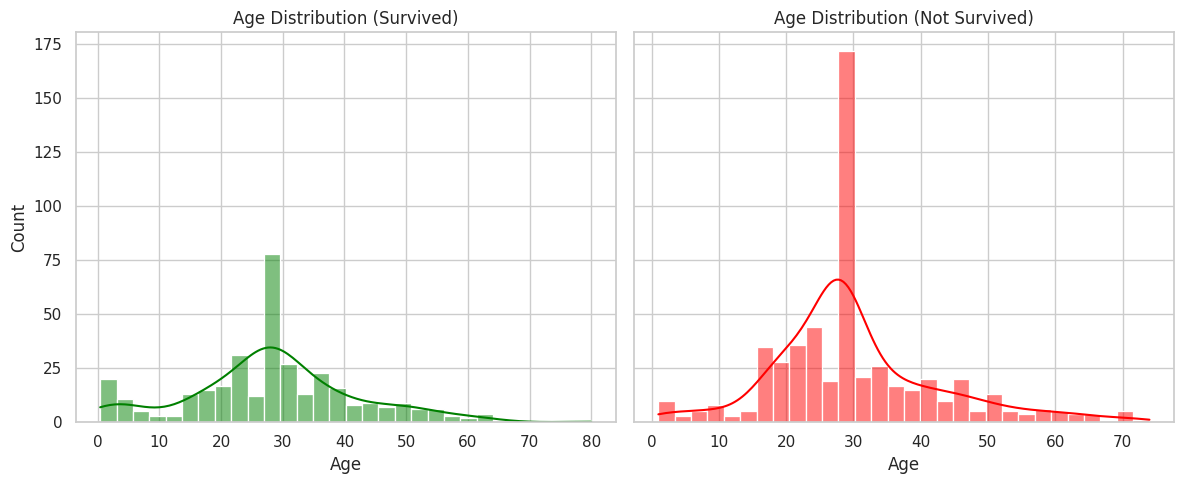

In [52]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # 1 row, 2 columns

# Plot for Survivors
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=True, color="green", ax=axes[0])
axes[0].set_title("Age Distribution (Survived)")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# Plot for Non-Survivors
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, kde=True, color="red", ax=axes[1])
axes[1].set_title("Age Distribution (Not Survived)")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Count")

# Show the plots
plt.tight_layout()
plt.show()

In [53]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [54]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [55]:
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


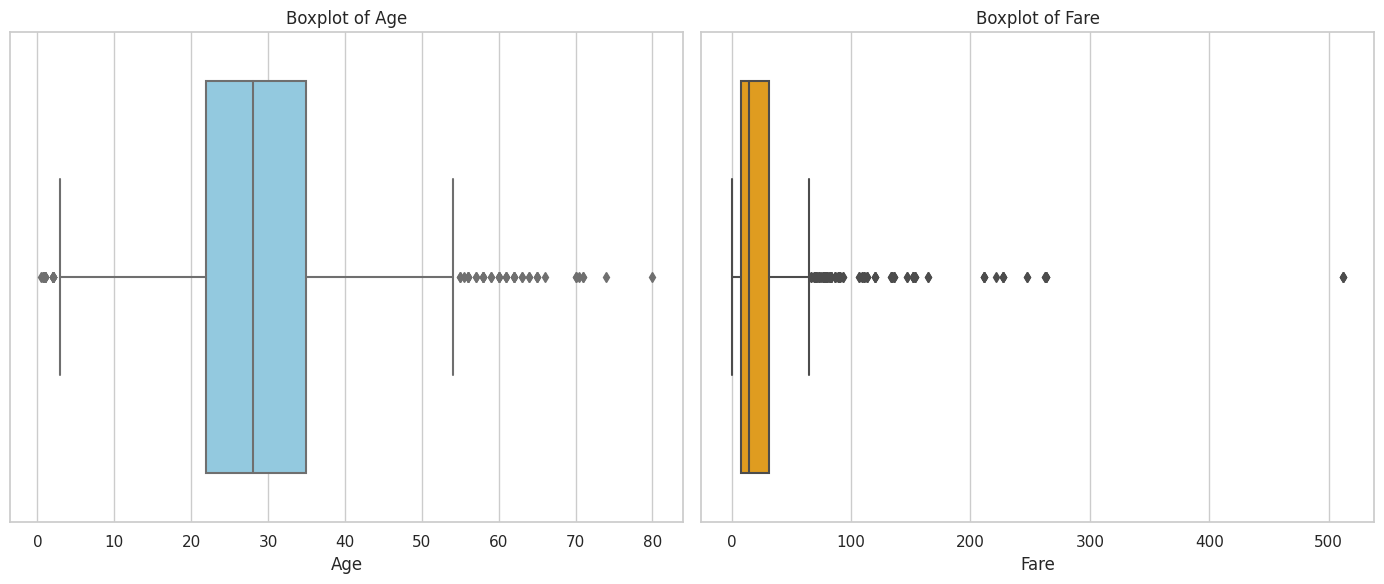

In [56]:
# Set plot style
sns.set(style="whitegrid")

# Create a figure with subplots for Age and Fare
plt.figure(figsize=(14, 6))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=df["Age"], color="skyblue")
plt.title('Boxplot of Age')

# Boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(x=df["Fare"], color="orange")
plt.title('Boxplot of Fare')

# Show the plots
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


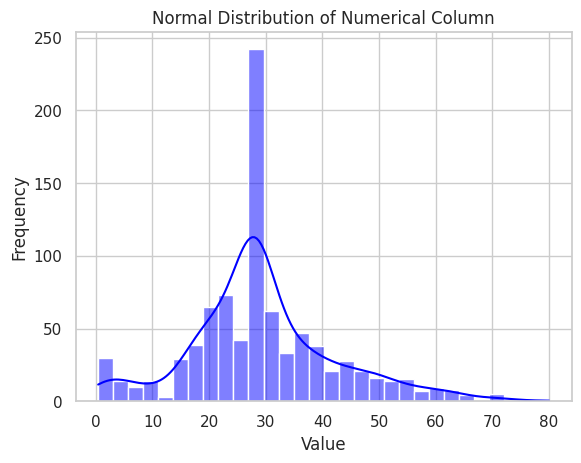

In [57]:
sns.histplot(df['Age'], kde=True, bins=30, color='blue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution of Numerical Column')
plt.show()

In [58]:
df['Age'].skew()

0.5102446555756496

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


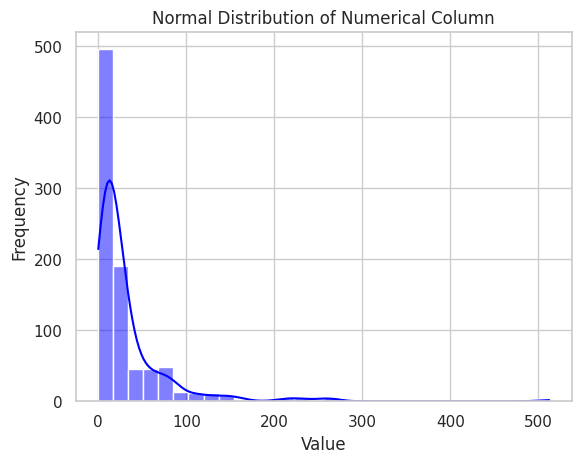

In [59]:
sns.histplot(df['Fare'], kde=True, bins=30, color='blue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution of Numerical Column')
plt.show()

In [60]:
df['Fare'].skew()

4.787316519674893

In [61]:
from scipy.stats import boxcox
y = np.log1p(df["Fare"])  # log1p handles zero values
x = np.sqrt(df["Fare"])   # Square root transformation
fare_boxcox, lambda_bc = boxcox(df["Fare"] + 1)  # Box-Cox transformation (shift by 1)

# Calculate skewness for the original and transformed data
print("Original Skewness:", df["Fare"].skew())
print("Log1p Skewness:", y.skew())
print("Sqrt Skewness:", x.skew())
print("Box-Cox Skewness:", pd.Series(fare_boxcox).skew())

# Store skewness values for each transformation
skewness_values = {
    "Log1p": y.skew(),
    "Sqrt": x.skew(),
    "Box-Cox": pd.Series(fare_boxcox).skew()
}

# Find the transformation with the least skewness
best_transformation = min(skewness_values, key=skewness_values.get)

# Print the best transformation
print(f"Best transformation based on skewness: {best_transformation}")

Original Skewness: 4.787316519674893
Log1p Skewness: 0.3949280095189306
Sqrt Skewness: 2.0850044182023506
Box-Cox Skewness: -0.04032915137339808
Best transformation based on skewness: Box-Cox


In [62]:
df["Fare"], lambda_bc = boxcox(df["Fare"] + 1)


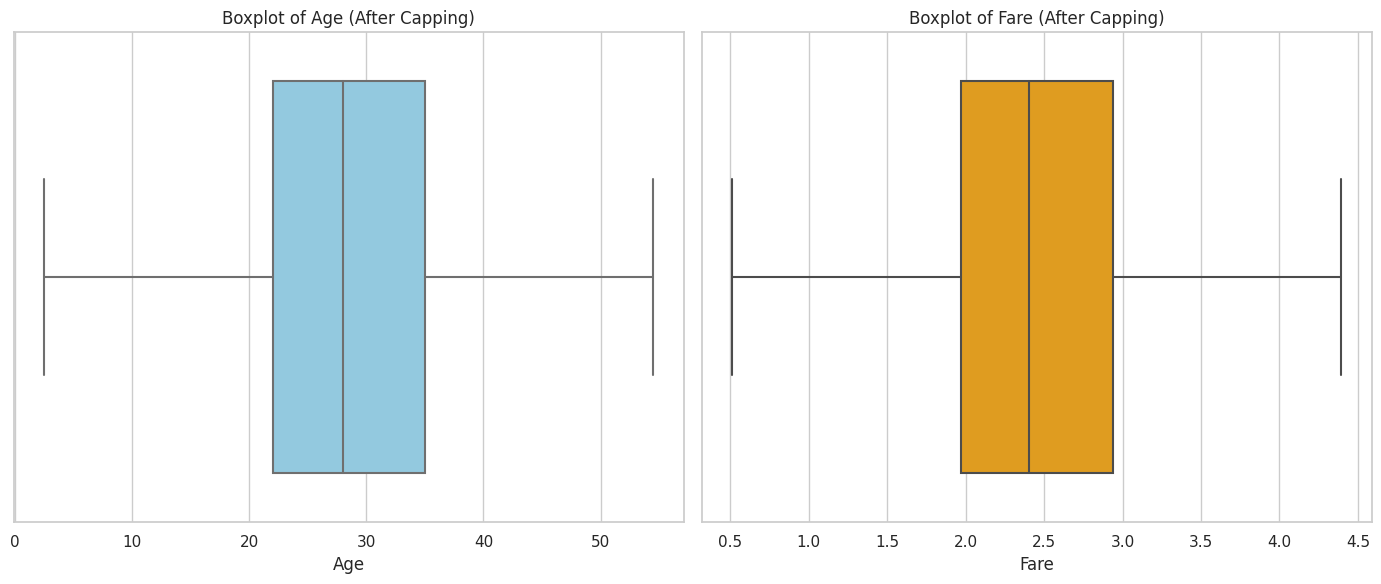

In [63]:
# Function to cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    
    # Cap the outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Apply the function to 'Age' and 'Fare' columns
cap_outliers(df, "Age")
cap_outliers(df, "Fare")

# Boxplots after capping outliers
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["Age"], color="skyblue")
plt.title('Boxplot of Age (After Capping)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Fare"], color="orange")
plt.title('Boxplot of Fare (After Capping)')

plt.tight_layout()
plt.show()


In [64]:
# Function to extract surname from the Name column
def extract_surname(name):
    return name.split(",")[0]  # Surname is before the comma

# Apply the function to the Name column
df["Surname"] = df["Name"].apply(extract_surname)

# Drop the original Name column (if not needed)
df.drop(columns=["Name"], inplace=True)

# Display the first few rows
df.head()


,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,FamilySize,Surname
0,0,3,male,22.0,A/5 21171,1.906724,S,2,Braund
1,1,1,female,38.0,PC 17599,3.497640,C,2,Cumings
2,1,3,female,26.0,STON/O2. 3101282,1.970459,S,1,Heikkinen
3,1,1,female,35.0,113803,3.304258,S,2,Futrelle
4,0,3,male,35.0,373450,1.981680,S,1,Allen


In [65]:
df['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [66]:
import re

# Function to extract ticket prefix
def extract_ticket_prefix(ticket):
    parts = ticket.split()  # Split by space
    if len(parts) > 1:  
        return parts[0]  # Return prefix (first part)
    else:
        return "None"  # If no prefix, mark as Numeric

# Function to extract ticket number
def extract_ticket_number(ticket):
    return re.sub(r'\D', '', ticket)  # Remove all non-numeric characters

# Apply transformations
df["Ticket_Prefix"] = df["Ticket"].apply(extract_ticket_prefix)
df["Ticket_Number"] = df["Ticket"].apply(extract_ticket_number)

# Drop the original Ticket column (optional)
df.drop(columns=["Ticket"], inplace=True)

# Display results
df.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Surname,Ticket_Prefix,Ticket_Number
0,0,3,male,22.0,1.906724,S,2,Braund,A/5,521171
1,1,1,female,38.0,3.497640,C,2,Cumings,PC,17599
2,1,3,female,26.0,1.970459,S,1,Heikkinen,STON/O2.,23101282
3,1,1,female,35.0,3.304258,S,2,Futrelle,None,113803
4,0,3,male,35.0,1.981680,S,1,Allen,None,373450


In [67]:
df["Ticket_Number"] = pd.to_numeric(df["Ticket_Number"], errors="coerce")

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    object 
 3   Age            891 non-null    float64
 4   Fare           891 non-null    float64
 5   Embarked       891 non-null    object 
 6   FamilySize     891 non-null    int64  
 7   Surname        891 non-null    object 
 8   Ticket_Prefix  891 non-null    object 
 9   Ticket_Number  887 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 69.7+ KB


In [69]:
# Define features and target variable
X = df.drop(columns=["Survived"])  # Drop target column
y = df["Survived"]

In [70]:
# Identify numerical and categorical features
numerical_features = ["Age", "Fare", "FamilySize", "Ticket_Number"]
categorical_features = ["Sex", "Embarked", "Ticket_Prefix","Surname"] 

In [71]:
# Preprocessing for numerical features
num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # Fill missing values
    ("scaler", StandardScaler())  # Scale values
])

In [72]:
# Preprocessing for categorical features
cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Fill missing values
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # One-hot encoding
])

In [73]:
# Combine transformations using ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", num_transformer, numerical_features),
    ("cat", cat_transformer, categorical_features)
])

In [74]:
# Define models
models = {
    "Linear SVM": SVC(kernel="linear", C=1),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Linear SVM Accuracy: 0.8156
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

Confusion Matrix:
 [[94 11]
 [22 52]]

Decision Tree Accuracy: 0.7989
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[91 14]
 [22 52]]

Random Forest Accuracy: 0.8268
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.70      0.77        74

    accuracy 

In [75]:
# Make predictions on test data using the trained model
y_test_pred = pipeline.predict(X_test)


Test Accuracy: 0.8045
Test R² Score: 0.1937

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179


Confusion Matrix:
 [[94 11]
 [24 50]]


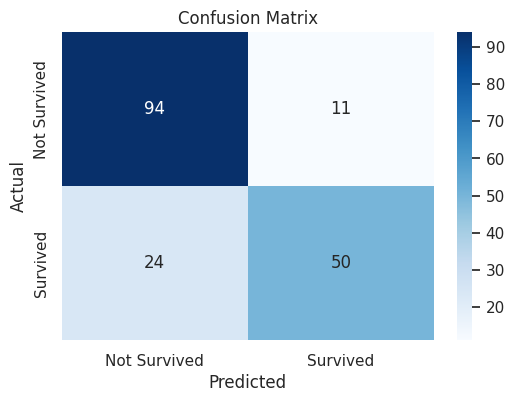

In [76]:
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Compute R² Score (useful mostly for regression, but we check it)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test R² Score: {test_r2:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
